<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Run the cells
- Observe and understand the results
- Answer the questions

### Import libraries

This notebook was run and tested on Keras version 2.3.1 and Tensorflow 2.2.0. 

In [1]:
# Check keras and tensorflow versions

import sys
import tensorflow as tf
from tensorflow import keras

print("Keras version: ", keras.__version__)
print("Tensorflow version: ", tf.__version__)

Keras version:  2.4.0
Tensorflow version:  2.3.0


In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(f'Built with cuda: {tf.test.is_built_with_cuda()}')
print(f'Tensorflow Version: {tf.__version__}')
print(f'Python: {sys.version}')

Num GPUs Available:  0
Built with cuda: False
Tensorflow Version: 2.3.0
Python: 3.8.10 (default, May 19 2021, 13:12:57) [MSC v.1916 64 bit (AMD64)]


In [3]:
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Load data

In [4]:
# The diabetes dataset
diabetes = load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [ ]:
#NN works with numpy array easier

In [7]:
# input
X = diabetes.data

# print the type of X to check that it is a numpy array
print("X is a ", type(X))

# Print shape to check rows and columns
print("X has {} rows and {} columns".format(X.shape[0], X.shape[1]))

# Save number of columns as n_cols
n_cols = X.shape[1]

# output
y = diabetes.target

print("First 10 values in y: ", y[:10])

X is a  <class 'numpy.ndarray'>
X has 442 rows and 10 columns
First 10 values in y:  [151.  75. 141. 206. 135.  97. 138.  63. 110. 310.]


In [8]:
# How many observations are in y?
len(y)

442

### Split the data (training/test)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

### Create the model's architecture

In [10]:
# Set up the model architecture
model = Sequential()

In [23]:
# Add the first hidden layer
model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))

model.add(Dense(5, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [24]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                165       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 80        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

### Compile the model

In [25]:
# Compile the model
model.compile(
    optimizer = 'adam',  #adam is faster than sgd
    loss = 'mse',
    metrics = ['mse'])

### Fit the training data

In [26]:
#extra step to add randomness

# shuffle training data
from sklearn.utils import shuffle
X_train2, y_train2 = shuffle(X_train, y_train, random_state=42)

In [28]:
%%time
# Fit the model
history = model.fit(
    X_train2,
    y_train2,
    validation_split = 0.25,
    batch_size = 10,  #model is trained for 10 cycles
    epochs = 500,  #1000 training steps
    verbose = 0)  #or verbose = 1

Wall time: 43.1 s


### Create predictions

In [29]:
predictions = model.predict(X_test)
predictions

array([[21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],
       [21.576427],


### Evaluate the model

In [30]:
# Calculate test MSE
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 4ms/step - loss: 23956.8105 - mse: 23956.8105

Test loss: 23956.810547


In [31]:
score

[23956.810546875, 23956.810546875]

In [32]:
# Find RMSE
score[0] ** (1/2)

154.77987771953755

In [33]:
y_test

array([107., 212., 196., 248., 164., 220., 131.,  78.,  97.,  66., 155.,
       222., 101., 192., 158., 259.,  87., 132.,  49., 276.,  37., 134.,
        78.,  84., 236., 167.,  78., 115.,  85., 232., 268., 317., 198.,
        71., 214., 118.,  72., 280., 166., 144., 135.,  68., 129., 246.,
        50., 242., 104.,  68., 127.,  90., 214., 275., 311., 252., 293.,
        52., 143., 107.,  58.,  77., 134., 200., 233., 152., 126., 144.,
       103., 137., 163., 101., 180., 122.,  72.,  59.,  96., 145., 259.,
       158., 243., 183., 138., 292.,  44.,  43.,  90.,  52.,  71.,  52.,
       332., 139.,  65., 174., 288.,  74., 195.,  39.,  25., 142.,  53.,
       141., 244.,  97., 146., 178., 181., 170., 206., 303.,  92., 296.,
       232., 198., 242.,  71., 230.,  83., 102., 281., 265., 139., 341.,
        96., 170., 150., 179., 217., 151., 160., 200.,  65.,  64., 113.,
       263.])

In [34]:
y.mean()

152.13348416289594

In [35]:
y.std()

77.00574586945044

In [36]:
y.min()

25.0

In [37]:
y.max()

346.0

### Visualisation of cost

In [38]:
history.history

{'loss': [25860.447265625,
  25853.9765625,
  25847.365234375,
  25840.763671875,
  25834.126953125,
  25827.576171875,
  25820.984375,
  25814.578125,
  25807.87109375,
  25801.16015625,
  25794.6953125,
  25788.11328125,
  25781.498046875,
  25775.017578125,
  25768.513671875,
  25762.087890625,
  25755.662109375,
  25749.26171875,
  25742.673828125,
  25736.0390625,
  25729.658203125,
  25723.287109375,
  25716.86328125,
  25710.392578125,
  25703.951171875,
  25697.375,
  25690.765625,
  25684.076171875,
  25677.3046875,
  25670.6328125,
  25664.099609375,
  25657.708984375,
  25651.24609375,
  25644.78125,
  25638.181640625,
  25631.591796875,
  25624.96875,
  25618.453125,
  25611.947265625,
  25605.365234375,
  25598.921875,
  25592.4921875,
  25585.89453125,
  25579.1953125,
  25572.60546875,
  25566.078125,
  25559.50390625,
  25552.939453125,
  25546.427734375,
  25540.037109375,
  25533.453125,
  25526.92578125,
  25520.27734375,
  25513.736328125,
  25507.22265625,
  25500.

In [39]:
history.history['val_mse']

[25206.9609375,
 25200.353515625,
 25193.75390625,
 25187.025390625,
 25180.646484375,
 25173.849609375,
 25167.359375,
 25160.763671875,
 25153.974609375,
 25147.390625,
 25140.865234375,
 25134.177734375,
 25127.701171875,
 25121.06640625,
 25114.55859375,
 25108.08984375,
 25101.67578125,
 25095.279296875,
 25088.513671875,
 25082.044921875,
 25075.654296875,
 25069.115234375,
 25062.63671875,
 25056.224609375,
 25049.77734375,
 25043.119140625,
 25036.423828125,
 25029.681640625,
 25022.888671875,
 25016.23046875,
 25009.806640625,
 25003.314453125,
 24996.681640625,
 24990.29296875,
 24983.61328125,
 24976.896484375,
 24970.271484375,
 24963.9375,
 24957.1640625,
 24950.69140625,
 24944.263671875,
 24937.728515625,
 24930.95703125,
 24924.287109375,
 24917.875,
 24911.267578125,
 24904.443359375,
 24898.009765625,
 24891.51953125,
 24885.080078125,
 24878.359375,
 24871.837890625,
 24865.16015625,
 24858.529296875,
 24852.1796875,
 24845.8671875,
 24839.388671875,
 24832.8515625,


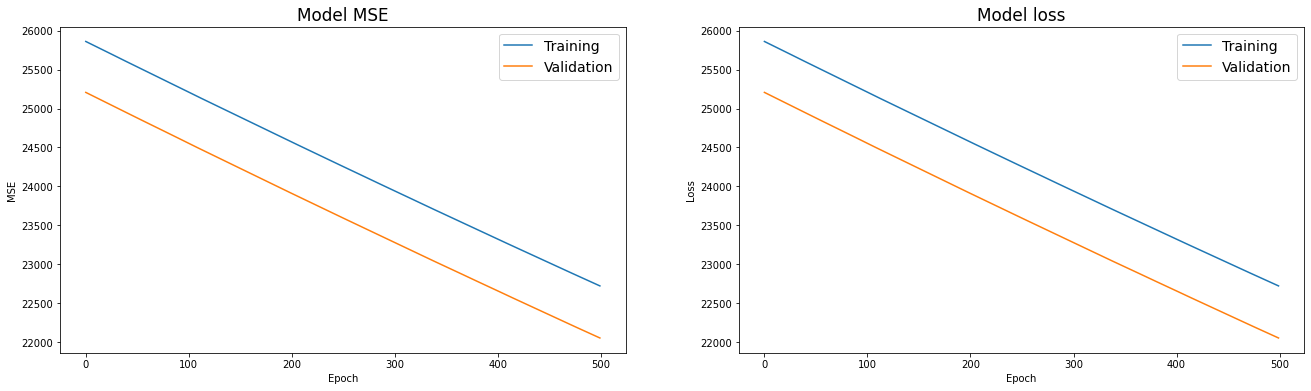

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (18, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 14})

# Plot training & validation accuracy values
ax[0].plot(history.history['mse'], label = 'Training')
ax[0].plot(history.history['val_mse'], label = 'Validation')
ax[0].set_title('Model MSE')
ax[0].set_ylabel('MSE')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

In [ ]:
#graphs above can give an indication if model is overfitting...

In [ ]:
#ricky, what does my graph indicate??

### Visualisation of residuals

In [27]:
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

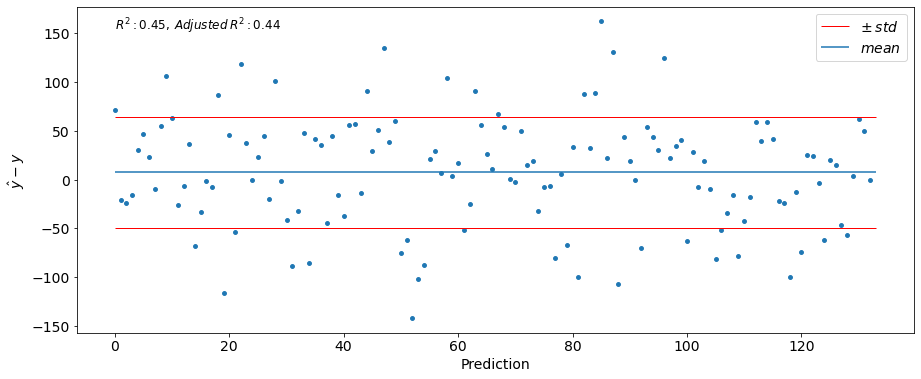

In [28]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



